# Fundamentos del procesamiento digital de imágenes 

![Imagen](https://www.nibcode.com/images/contents/1135/primary.png)

## Introducción:

A grandes rasgos el procesamiento de imágenes digitales es el conjunto de técnicas que se aplican a las imágenes digitales con el objetivo de mejorar la calidad o facilitar la obtención de información de estas.

### Imagenes digitales:

Una imagen digital es una representación bidimensional de una imagen a partir de una matriz numérica, frecuentemente en binario (unos y ceros) la cual podemos definir como una función f(x, y)  donde x, y son las coordenadas espaciales, y el valor de f en cualquier (x,y) representa la intensidad de la imagen en dicho punto.

Una imagen en blanco y negro se puede representar con unos y ceros, asignando 1 al color blanco y 0 al color negro. Si queremos que nuestra imagen varie entre tonos de grices podemos representar la imagen en escala de grices como matriz, la escala más utilizada es entre 0(negro) y 255(blanco).

## Uso de Python para el prosesamiento de imagenes:

Existen varios programas adaptados para el prosesamiento de imagenes como Wolfram Mathematica, Matlab y Python. Como bien es sabido Python es de los leguajes más usados actualmente ya que es facil de aprender y amigable a la hora de programar, además viene con muchas pero muchas librerias dedicadas a la interaccion con imagenes y es por estas razónes que las usaremos:

Para esta primera parte del curso solo nesesitaremos descargar dos librerias:

* Matplotlib: contien funciones que permiten la generación de gráficos a partir de datos contenidos en listas o arrays(tipo de lista).

* NumPy: contiene funciones matemáticas que sirven para operar con vectores y/o matrices.

Si aún no las has descargado puedes hacerlo ejecutando los sigientes codigos en el terminal:


In [ ]:
pip3 install matplotlib
pip3 install numpy

# Primeros pasos

Comencemos creando una imagen, imagenemos que tenemos una hoja cuadrada con una linea negra a la mitad, podemos reprecentar esto como una matriz de 3x3 con la segunda columna compuesta de ceros y el resto por unos:

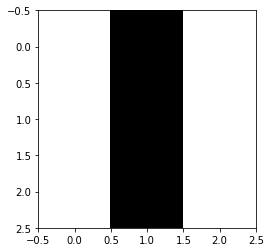

In [3]:
# importamos las librerias
import matplotlib.pyplot as plt
import numpy as np

matriz = [[1, 0, 1],
          [1, 0, 1],
          [1, 0, 1]]

#establecemos que la imagen a crear estara en tono de grices
plt.rcParams['image.cmap'] = 'gray'

# pasamos la matris a un array
imagen_negra = np.array(matriz)

# creamos la imagen y la mostramos, vmin y vmax establece los valores de la escala
plt.imshow(imagen_negra,vmin=0,vmax=1) # vmin y vmax NO son necesarios si la imagen es a color
plt.show()

Ahora tratemos de hacer un efecto de difuminado entre las linea blancas y la negra. Para lograr esto es evidente que nesesitaremos una mayor escala de grices y una matriz de mayor tamaño, además de una funcion que modele la intencidad de lo tonos de la imagen con respecto a la linea central:

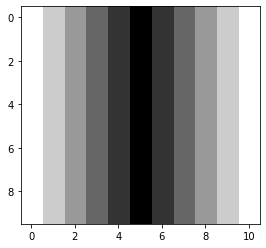

In [4]:
# naturalmente tendremos 4 variables importantes: la posición en el eje x 
                                                # de la posición linea horizontal(pos_x),
                                                # la escala de tonos de la imagen 
                                                # y finalmente el ancho y alto.
def imagen_difuminada(pos_x, escala, ancho, alto):
    # creamos una lista que representara la matriz de la imagen y otra para cada fila de esta
    imagen_total = []
    imagen_linea = []
    for y in range(alto):
        for x in range(ancho):
            # calculamos la distancia horizontal entre la linea y un punto de la imagen
            delta_x = (abs(x - pos_x))
            # usamos la diferencia para determinar la escala de tonos en ese punto
            if delta_x < escala:
                imagen_linea.append(delta_x)

            else:
                imagen_linea.append(escala)

        imagen_total.append(imagen_linea)
        imagen_linea = []
    # pasamos la lista a un array y la retornamos
    imagen = np.array(imagen_total)
    
    return imagen
# establecemos la escala de la grafica y la mostramos
def mostrar_imagen(imagen, escala):
    plt.imshow(imagen,vmin = 0, vmax = escala)
    plt.show()


imagen = imagen_difuminada(5, 5, 11, 10)
mostrar_imagen(imagen, 5)

Para este punto te habras dado cuenta que cada espacio dentro de la matriz reprecenta un pixel y que su número representa la intencidad de luz que emite cada uno.

Volviendo al ejercicio anterior, podras notar que la difiminacion no es perfecta, ya que aún hay mucho constraste entre un tono y otro, podemos solucionar esto aumentando la escala de tonos de la imagen y aumentando el numero de pixeles por unidad de area:

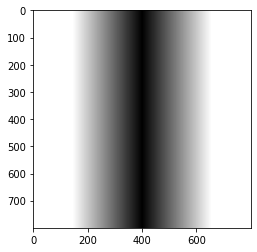

In [12]:
# aplicando la escala clasica de 0 a 255
imagen_difu = imagen_difuminada(400, 255, 800, 800)
mostrar_imagen(imagen_difu, 255)

siguiendo el prosedimiento vemos que la calidad de la imagen mejora considerablemente lo que nos lleva a un punto importante, la resoloción, pociblemente hayas escuchado el termino si alguna vez trataron de venderte una camara o algo así, la resolucion, en terminos de una imagen, se refiere a la cantida de pixeles contenidos en una pulgada (2,54 cm), actualmente la resolucion promedio de un computador es de 1024 x 768 píxeles pero se a llegado a llegado a resoluciones de hasta  2560 x 1600 píxeles lo que es simplemente increible si penzamos que la retina humana promedio puede discernir hasta los 530 x 530 píxeles por pulgada (y ni hablar de los que usan lentes).

### Ejercicios:
Escribir un codigo en python que cree una imagen con:
* un circulo
* un anillo 
* un anillo difuminado 


## Graficas
Es importante reprensentar las los datos propios de las imagenes a fin de obetener la mayor cantidad de información de ellas, una de las grafica importante es la del muestreo espacial en tonos de grices que corresponde a un grafico 3D lo que puede implementar mediante el siguiente codigo:

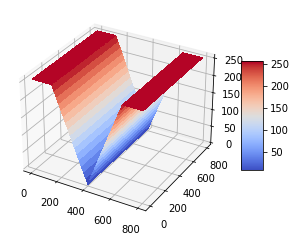

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def muestreo_espacial(imagen, escala):
    # con esto creamos una fugura 3D a la que le daremos valores en cada eje 
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # esto establezera las matrizes de valores para los eje x e y
    X = np.arange(0, len(imagen[0]), 1)
    Y = np.arange(0, len(imagen), 1)
    X, Y = np.meshgrid(X, Y)
    
    # aqui definiremos la matriz ce eje z como la que representara los valores de la matriz imagen.
    Z = imagen

    # plot_surface establecera la superficie de la grafica.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # definimos los limites del eje z.
    ax.set_zlim(0, 255)

    # y finalmente agregaremos una barra de colores.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
# usando el ejemplo anterior
muestreo_espacial(imagen_difu, 255) 

# Imagenes a Color
Para crear una imagen es nescesario que un pixel tenga a su dispocion un gama de colores que poder variar, así como los colores primarios: rojo, azul y amarillo pueden mesclarese entre si para dar vida a todo los demas coleres un pixel puede variar la intencidad de sus pigmentos para hacer lo mismo. Una imágenes multicolor dependeran del sistema de color utilizado y entre toodos los sistemas el mas utilizado es el RGB(red, green and Blue). Con esto en mente ahora deberemos de considerar que cada pixel será representado como un vector tridimensional (r, g, b) donde r, g y b seran números enteros de 0 a 255.

![Imagen](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSgWpa9actlEsf5LjQRa7OfzfKmxg21vHFOVA&usqp=CAU)

## Trabajar con imagenes 
Hasta el momento hemos visto como crear imagenes simples en blanco y negor pero ¿Que ocurre si queremos trabajar con imagenes ya existentes que esta a color? Para esto esta la libreria PIL que funciones con las que se puenden interactuar con las imagenes a nivel pixel.

Comencemos viendo unas funciones basicas:

In [ ]:
from PIL import Image

imagen = Image.open('charmander.png') # con este codigo abrimos una imagen para trabajar con ella

x = imagen.size[0] #retorla el numero de pixeles en el eje x
y = imagen.size[1] #retorla el numero de pixeles en el eje y

r, g, b = im.getpixel((i,j)) # retorna el vector RGB en la pocición (i,j)

new_imagen = Image.new('RGB', (i, j)) # crea una nueva imagen del tipo RGB de dimenciones i, j
    
new_imagen.putpixel((i,j), pixel) # estableze los parametros de un 
                                  # pixel (r, g,b) en la pocicion i,j

new_imagen.save('new_imagen.png') # guarda una imagen con el nombre dado
new_imagen.show() # muestra la imagen

Tambien existe la libreria scikit-image que al igual que PIL permite trabajar con imagenes de forma matricial aunque con una estetica distinta. A diferencia de PIL esta debe ser descargada, si deseas usarla puedes hacerlo ejecutando el siguiente codigo en tu terminal:

In [ ]:
pip3 install scikit-image

He aqui unas funcianes basicas:

In [ ]:
from skimage import io

imagen = io.imread("charmander.png") # retorna una matriz en forma de lista de listas 
                                     # compuesta por cada pixel con cada uno de ellos 
                                     # representado como una lista [R, G, B]
        
dimenciones = image.shape # .shape retorna una tupla con el num de pixeles en 
                          # los ejes x e y

io.imsave("new_charmander.png", imagen) # guarda una imagen bajo en nombre seleccionado

## Fuenetes:
* https://www.nibcode.com/es/blog/1135/algebra-lineal-y-el-procesamiento-digital-de-imagenes-parte-I
* https://www.unioviedo.es/galiano/master/lab01_introduccion_imagen_py.html
* https://es.wikipedia.org/wiki/Procesamiento_digital_de_imágenes
* https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
* https://wizardprogrammer.blogspot.com/2019/03/convertir-imagen-blanco-y-negro-python.html